# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA



# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [ ]:
uploaded = files.upload()

Saving bank_transactions_data_edited.csv to bank_transactions_data_edited.csv


In [ ]:
df = pd.read_csv('bank_transactions_data_edited.csv')

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

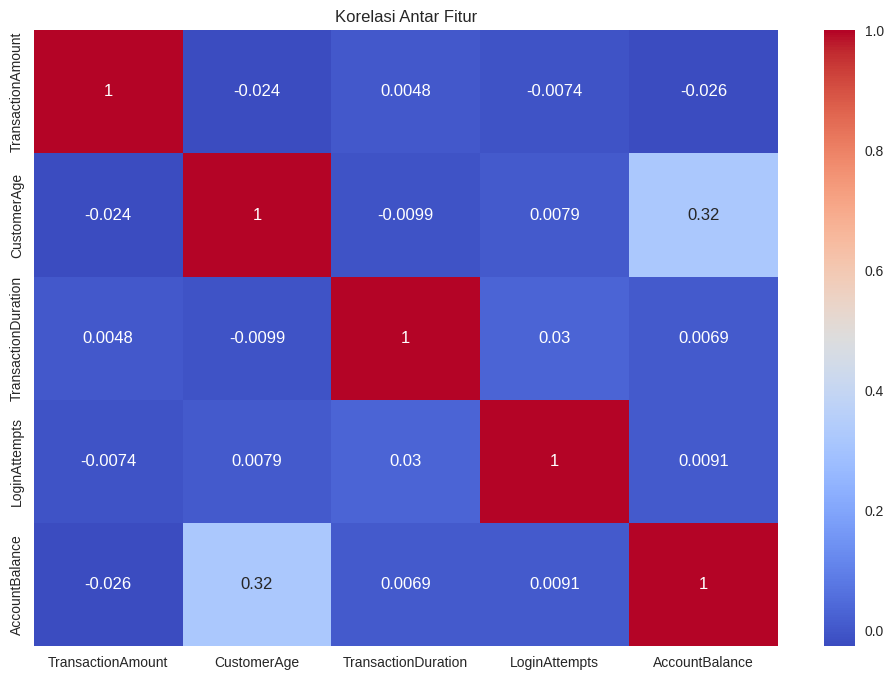

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

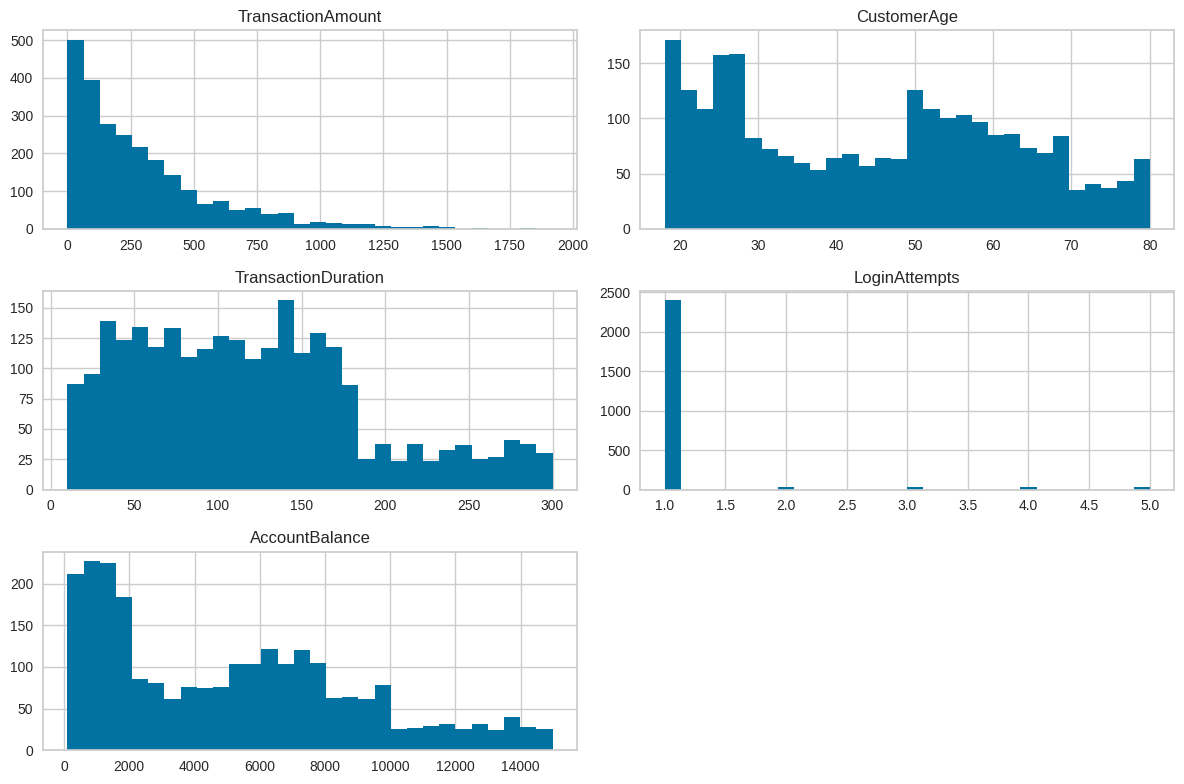

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

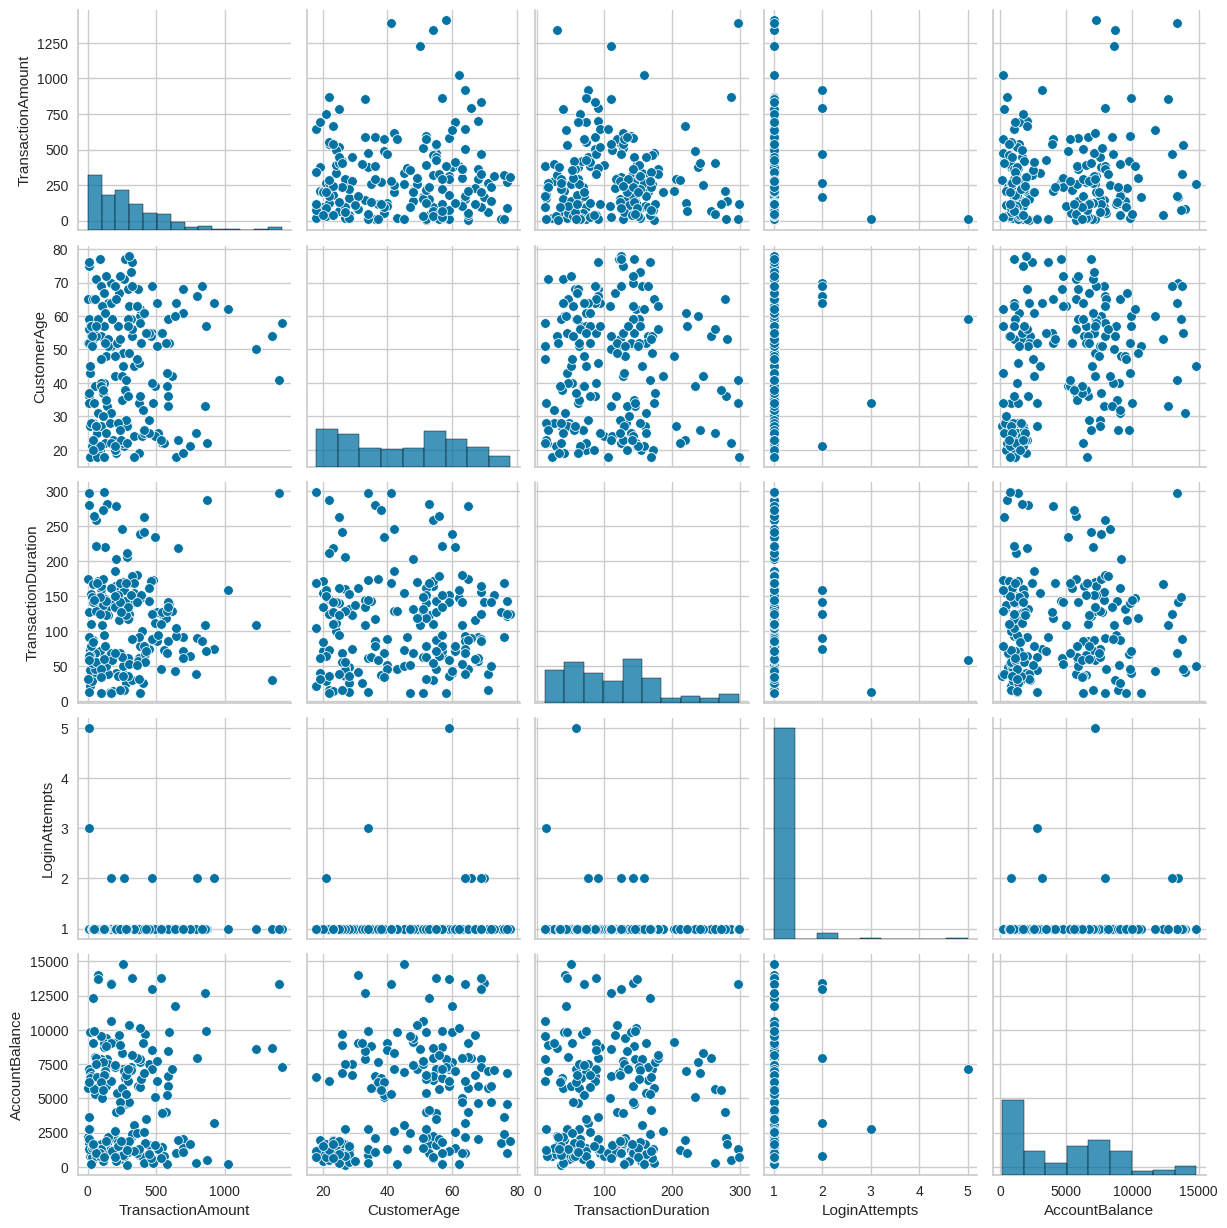

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.pairplot(df.select_dtypes(include=['float64', 'int64']).sample(n=200))
plt.show()

 **Metode yang digunakan → Pairplot atau boxplot dari seaborn**

 **Alasan penggunaan → Memberikan pemahaman mendalam terhadap interaksi fitur dan distribusinya.**

 **Hasil yang didapat → Visualisasi multivariat yang memperlihatkan pola antar fitur.**

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
print(df.isnull().sum())


TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 21


In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
numeric_colums = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df[numeric_colums] = scaler.fit_transform(df[numeric_colums])

In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id
columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'MerchantID']
df=df.drop(columns=columns_to_drop)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.fillna(df.mean(numeric_only=True))

**Metode yang digunakan → fillna() atau dropna() tergantung konteks**

**Alasan penggunaan → Menghindari bias atau error saat model training.**

**Hasil yang didapat → Dataset tanpa nilai kosong.**

In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
outlier_filter = (df['TransactionAmount'] >= Q1 - 1.5 * IQR) & (df['TransactionAmount'] <= Q3 + 1.5 * IQR)
df = df[outlier_filter]

In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.
bins = [df['CustomerAge'].min(), df['CustomerAge'].quantile(0.33), df['CustomerAge'].quantile(0.66), df['CustomerAge'].max()]
labels = ['Young', 'Middle-Aged', 'Old']
df['CustomerAge_binned'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels)

In [ ]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
cat_columns = df.select_dtypes(include=['object','category']).columns
df_pre = pd.get_dummies(df, columns=cat_columns, drop_first=True)

In [ ]:
df_pre.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000
mean,0.132989,0.430250,0.377465,0.030749,0.338716
std,0.112431,0.285584,0.240517,0.148482,0.260611
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040989,0.145161,0.182759,0.000000,0.096025
50%,0.104000,0.435484,0.358621,0.000000,0.322235
75%,0.193249,0.661290,0.520690,0.000000,0.506870
max,0.467223,1.000000,1.000000,1.000000,1.000000


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_pre.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2402.000000,2402.000000,2402.000000,2402.000000,2402.000000
mean,0.132989,0.430250,0.377465,0.030749,0.338716
std,0.112431,0.285584,0.240517,0.148482,0.260611
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040989,0.145161,0.182759,0.000000,0.096025
50%,0.104000,0.435484,0.358621,0.000000,0.322235
75%,0.193249,0.661290,0.520690,0.000000,0.506870
max,0.467223,1.000000,1.000000,1.000000,1.000000


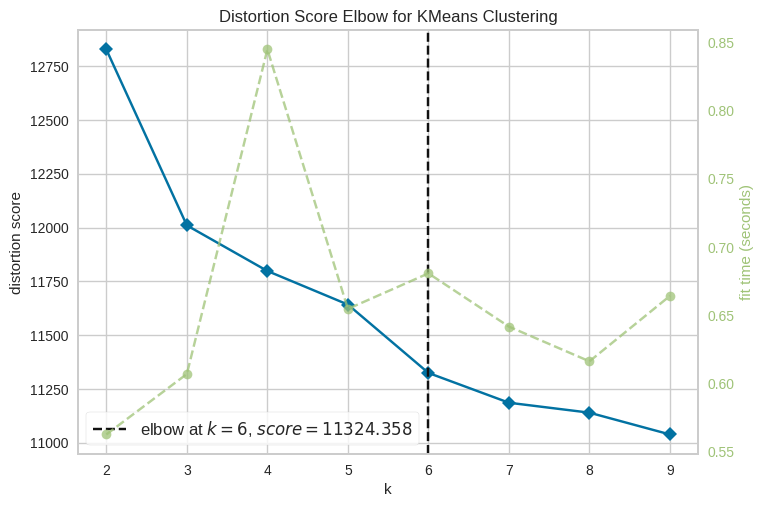

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df_pre)
visualizer.show()

In [ ]:
# Menggunakan algoritma K-Means Clustering
k_opt = visualizer.elbow_value_
model = KMeans(n_clusters=k_opt, random_state=42)
df_pre['Target'] = model.fit_predict(df_pre)


Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")

joblib.dump(model, "model_clustering.h5")

['model_clustering.h5']

In [ ]:
files.download("model_clustering.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(df_pre.drop(columns='Target'), df_pre['Target'])
print(f"Silhouette Score: {score}")

Silhouette Score: 0.05149224357111905


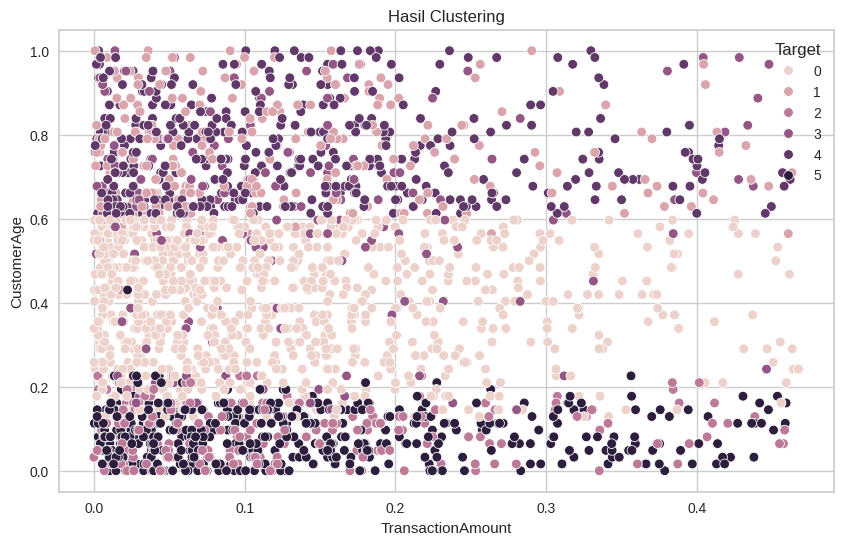

In [ ]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TransactionAmount', y='CustomerAge', hue='Target', data=df_pre)
plt.title('Hasil Clustering')
plt.xlabel('TransactionAmount')
plt.ylabel('CustomerAge')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_pre)

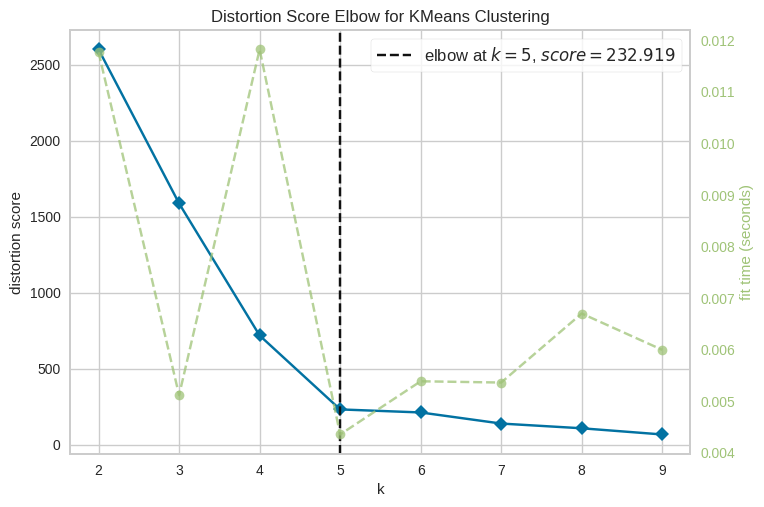

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df_pca)
visualizer.show()

In [ ]:
k_opt = visualizer.elbow_value_
model = KMeans(n_clusters=k_opt, random_state=42)
clusters = model.fit_predict(df_pca)

In [ ]:
df_pre['Target'] = clusters

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(model, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

In [ ]:
files.download("PCA_model_clustering.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
score = silhouette_score(df_pca, clusters)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.8176


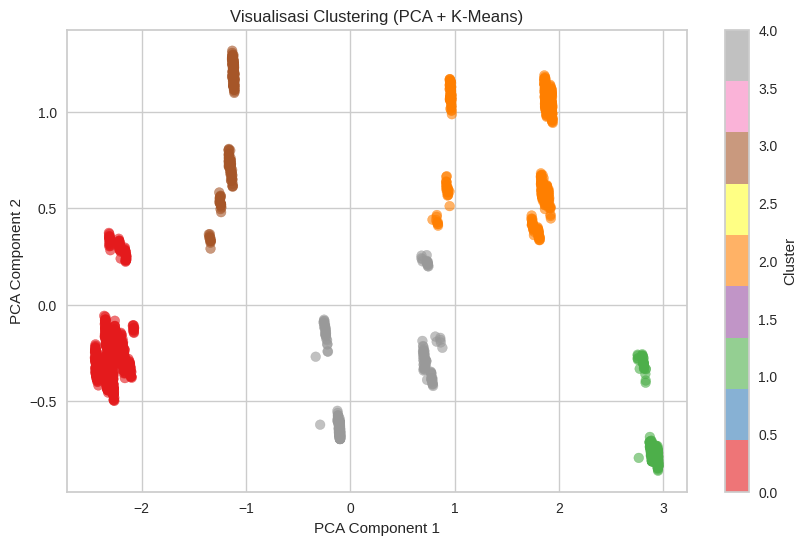

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='Set1', alpha=0.6)
plt.title("Visualisasi Clustering (PCA + K-Means)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')  # Opsional: menampilkan label warna cluster
plt.show()

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
df_pre['Cluster'] = kmeans.labels_

In [ ]:
df_pre.dtypes


,0
TransactionAmount,float64
CustomerAge,float64
TransactionDuration,float64
LoginAttempts,float64
AccountBalance,float64
...,...
PreviousTransactionDate_2024-11-04 08:12:23,bool
CustomerAge_binned_Middle-Aged,bool
CustomerAge_binned_Old,bool
Target,int32


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

In [ ]:
# Pilih kolom numerik dan hilangkan kolom cluster ('Target')
numeric_columns = df_pre.select_dtypes(include=['int64', 'float64']).columns

# Agregasi per cluster berdasarkan kolom 'Target'
numeric_summary = df_pre.groupby('Target')[numeric_columns].agg(['mean', 'min', 'max', 'std', 'median'])
print(numeric_summary)



       TransactionAmount                                         CustomerAge  \
                    mean       min       max       std    median        mean   
Target                                                                         
0               0.128978  0.000031  0.467223  0.108473  0.101824    0.396650   
1               0.141948  0.000313  0.459046  0.118949  0.109300    0.089921   
2               0.135582  0.000839  0.461698  0.113526  0.111116    0.763391   
3               0.126772  0.000813  0.462939  0.114502  0.094080    0.764587   
4               0.131462  0.000000  0.458082  0.109619  0.103765    0.172645   

                                                ... LoginAttempts            \
             min       max       std    median  ...          mean  min  max   
Target                                          ...                           
0       0.129032  0.596774  0.135891  0.403226  ...      0.033214  0.0  1.0   
1       0.000000  0.430297  0.058387  0.080

In [ ]:
# Fitur dummy (binary/categorical) hasil one-hot encoding
encoded_cat_cols = [col for col in df_pre.columns if col not in numeric_columns and col != 'Target']

# Menghitung proporsi tiap kategori per cluster
categorical_summary = df_pre.groupby('Target')[encoded_cat_cols].mean()

# Tampilkan proporsi sebagai representasi distribusi kategori
print(categorical_summary)


        TransactionDate_2023-01-02 16:01:14  \
Target                                        
0                                  0.000000   
1                                  0.002198   
2                                  0.000000   
3                                  0.000000   
4                                  0.000000   

        TransactionDate_2023-01-02 16:01:26  \
Target                                        
0                                  0.001147   
1                                  0.000000   
2                                  0.000000   
3                                  0.000000   
4                                  0.000000   

        TransactionDate_2023-01-02 16:06:29  \
Target                                        
0                                  0.000000   
1                                  0.000000   
2                                  0.001866   
3                                  0.000000   
4                                  0.000000   

        Tr

## Analisis Karakteristik Tiap Cluster Berdasarkan Rentang Nilai

### Cluster 0
- **Rata-rata TransactionAmount:** 0.1289  
- **Rata-rata CustomerAge:** 0.3966  
- **Rata-rata AccountBalance:** 0.4309  
- **Rata-rata LoginAttempts:** 0.0332  
- **Analisis:**  
  Cluster ini merepresentasikan pengguna **dewasa awal** dengan **saldo rekening sedang**, **aktivitas transaksi sedang**, dan **frekuensi login rendah ke sedang**.

---

### Cluster 1
- **Rata-rata TransactionAmount:** 0.1419  
- **Rata-rata CustomerAge:** 0.0899  
- **Rata-rata AccountBalance:** 0.1290  
- **Rata-rata LoginAttempts:** 0.0298  
- **Analisis:**  
  Cluster ini menggambarkan **pengguna paling muda**, dengan **saldo sangat rendah**, **aktivitas transaksi tinggi**, dan **login jarang**.

---

### Cluster 2
- **Rata-rata TransactionAmount:** 0.1356  
- **Rata-rata CustomerAge:** 0.7634  
- **Rata-rata AccountBalance:** 0.4119  
- **Rata-rata LoginAttempts:** 0.0256  
- **Analisis:**  
  Cluster ini terdiri dari **pengguna lanjut usia** dengan **saldo cukup tinggi**, **aktivitas transaksi tinggi**, namun **jarang login**.

---

### Cluster 3
- **Rata-rata TransactionAmount:** 0.1267  
- **Rata-rata CustomerAge:** 0.7646  
- **Rata-rata AccountBalance:** 0.3752  
- **Rata-rata LoginAttempts:** 0.0411  
- **Analisis:**  
  Cluster ini juga mewakili **pengguna usia lanjut**, dengan **saldo menengah**, **login tertinggi di antara semua cluster**, dan **aktivitas transaksi sedang**.

---

### Cluster 4
- **Rata-rata TransactionAmount:** 0.1315  
- **Rata-rata CustomerAge:** 0.1726  
- **Rata-rata AccountBalance:** 0.2263  
- **Rata-rata LoginAttempts:** 0.0256  
- **Analisis:**  
  Cluster ini menunjukkan **pengguna muda (usia remaja-dewasa awal)** dengan **saldo rendah**, **login rendah**, dan **transaksi sedang**.

---

### Ringkasan Pola:
- **Cluster 1** → *Pengguna termuda*, transaksi tinggi, saldo rendah.  
- **Cluster 2 & 3** → *Pengguna usia lanjut*, saldo tinggi–sedang, login rendah (Cluster 3 login lebih tinggi).  
- **Cluster 0** → *Dewasa awal*, saldo menengah, login sedikit.  
- **Cluster 4** → *Usia muda*, profil mirip cluster 1 namun transaksi sedikit lebih rendah.


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_pre['Target'] = clusters

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_pre.to_csv('data_clustering.csv', index=False)

In [ ]:
files.download("data_clustering.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal

In [ ]:
# Menambahkan kolom yang telah di-encode ke df_normalized


(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)